## Lets Explore our Dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
## Importing important libraries
import pandas as pd # Importing pandas for using dataframe
import numpy as np 
import matplotlib.pyplot as plt # importing matplotlib to rprent the analysis in graphs
import seaborn as sns # seaborn is also used to reprent different plots
import statistics 
%matplotlib inline

In [2]:
# Importing Dataset 
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 1. Distribution plot for numeric Columns

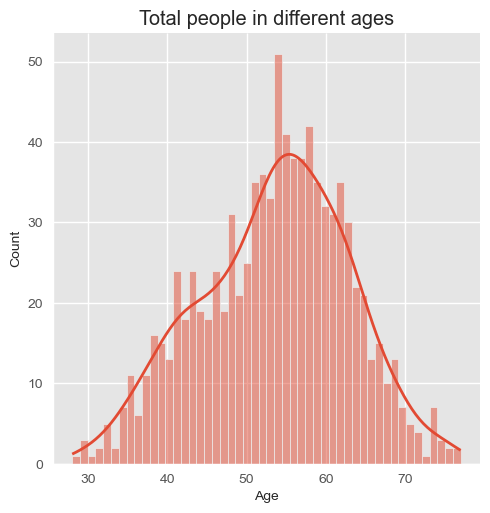

In [81]:
plt.style.use("ggplot")
sns.displot(data["Age"],kde=True,bins=50).set(title="Total people in different ages")


Now we can interpret that most of the data is covered between 50-60 age range

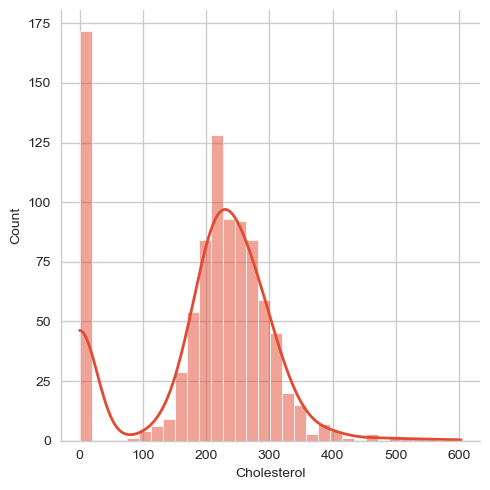

In [82]:
sns.set_style("whitegrid")
sns.displot(data["Cholesterol"],kde=True);

This distribution plot shows most of the people have cholestrol between 200-300

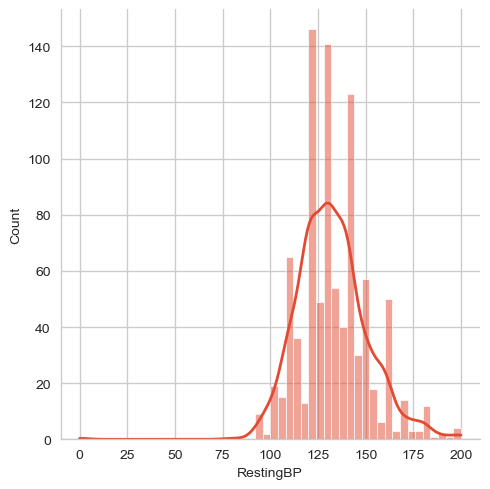

In [83]:
sns.set_style("whitegrid")
sns.displot(data["RestingBP"],kde=True,bins=50);

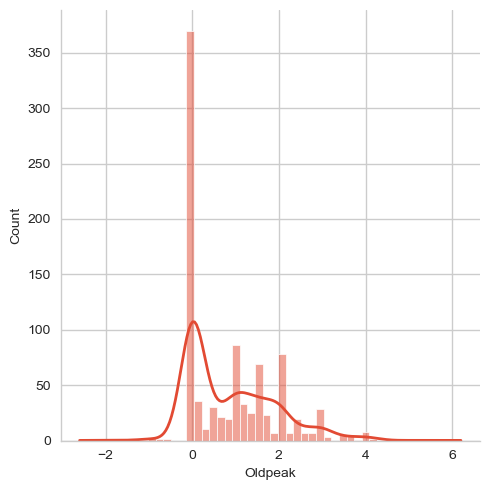

In [84]:
sns.set_style("whitegrid")
sns.displot(data["Oldpeak"],kde=True,bins=50);

# 2. Pie Charts for Categorical Columns

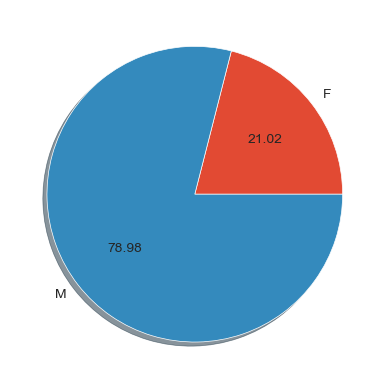

In [85]:
data.groupby("Sex").size().plot(kind="pie",autopct="%0.2f",shadow=True);

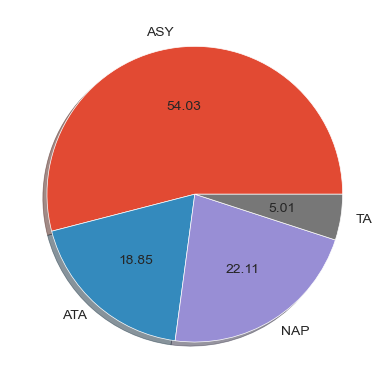

In [86]:
data.groupby("ChestPainType").size().plot(kind="pie",autopct="%0.2f",shadow=True);

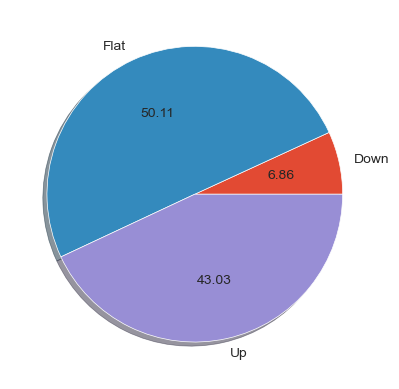

In [87]:
data.groupby("ST_Slope").size().plot(kind="pie",autopct="%0.2f",shadow=True);

## What does ST slope mean?
The ST segment shift relative to exercise-induced increments in heart rate.
This shows around 50.11 percent of the people have Flat ST slope

<Axes: >

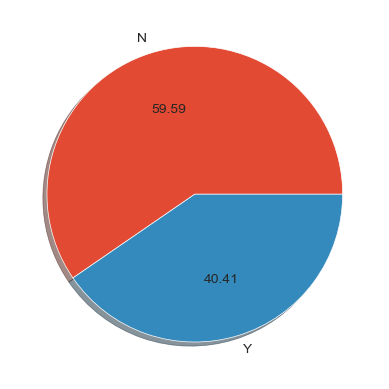

In [88]:
data.groupby("ExerciseAngina").size().plot(kind="pie",autopct="%0.2f",shadow=True)

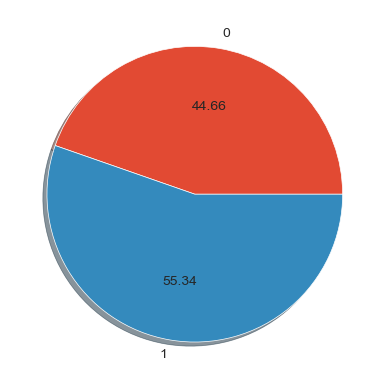

In [89]:
data.groupby("HeartDisease").size().plot(kind="pie",autopct="%0.2f",shadow=True);

In this we get to know that 55.34 people have heart disease

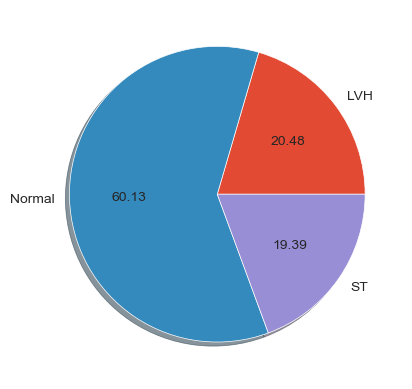

In [90]:
data.groupby("RestingECG").size().plot(kind="pie",autopct="%0.2f",shadow=True);

In this We get to know That around 60.13 have normal RESTING ECG

# 3. Combining Different Columns and finding Corelation

<Axes: xlabel='HeartDisease', ylabel='Age'>

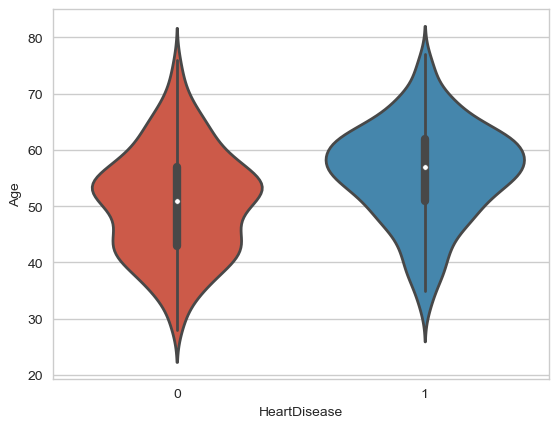

In [91]:
sns.violinplot(y=data["Age"],x=data["HeartDisease"])

Mean of Age having no heart disease is around 52 and a person having heart disease is expected to have an average age of around 
57

<Axes: xlabel='HeartDisease', ylabel='Sex'>

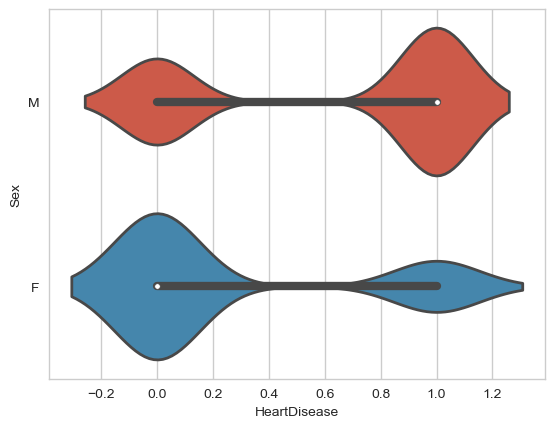

In [92]:
sns.violinplot(x=data["HeartDisease"],y=data["Sex"])

From this violin plot we get to know that :-
1. Females have less heart disease.
2. Males compared to Females have heart diseases

<Axes: xlabel='HeartDisease', ylabel='Age'>

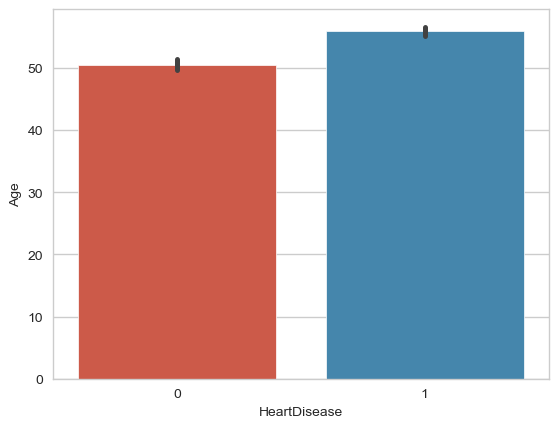

In [93]:
sns.barplot(y=data["Age"],x=data["HeartDisease"])

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

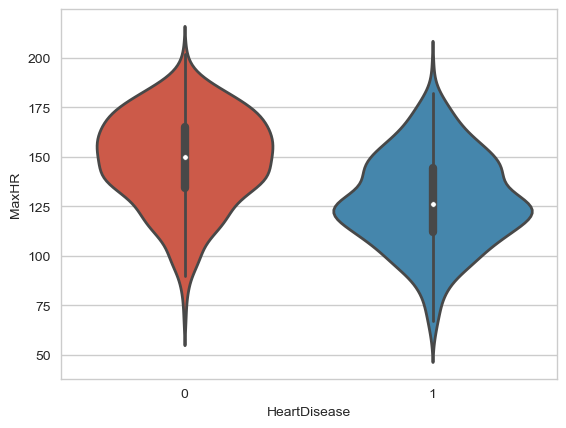

In [94]:
sns.violinplot(y=data["MaxHR"],x=data["HeartDisease"])

This predicts that people having an average of 126 Max heart rate have more chances of having an heart disease whereas people having heart rate arounf 150 do not have much chance of Heart Disease .

<Axes: xlabel='HeartDisease', ylabel='RestingECG'>

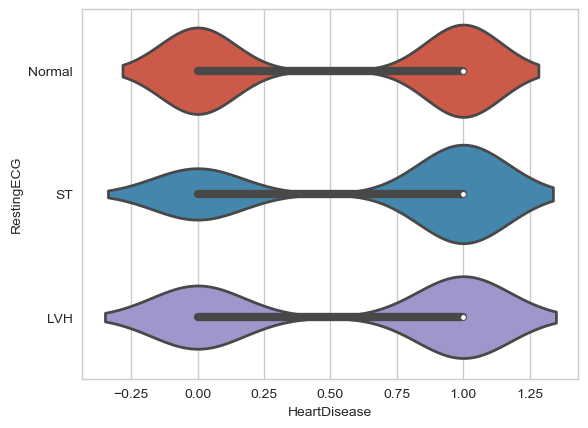

In [95]:
sns.violinplot(y=data["RestingECG"],x=data["HeartDisease"])

<Axes: xlabel='ST_Slope', ylabel='HeartDisease'>

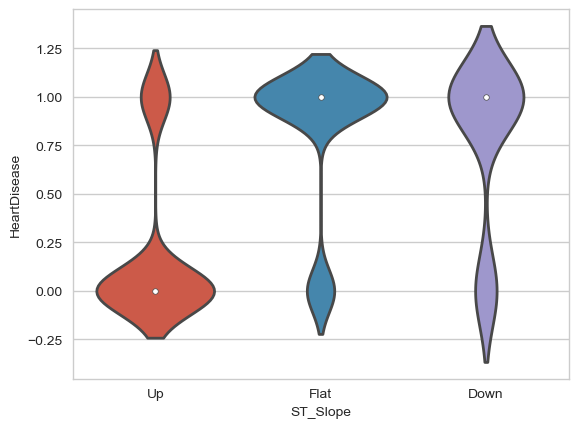

In [96]:
sns.violinplot(x=data["ST_Slope"],y=data["HeartDisease"])

1. People having ST Slope as Flat have more chances of having an heart disease .
2. People having ST slope as UP have least chance of getting a heart disease.

## 4. Finding Correlation between All the columns

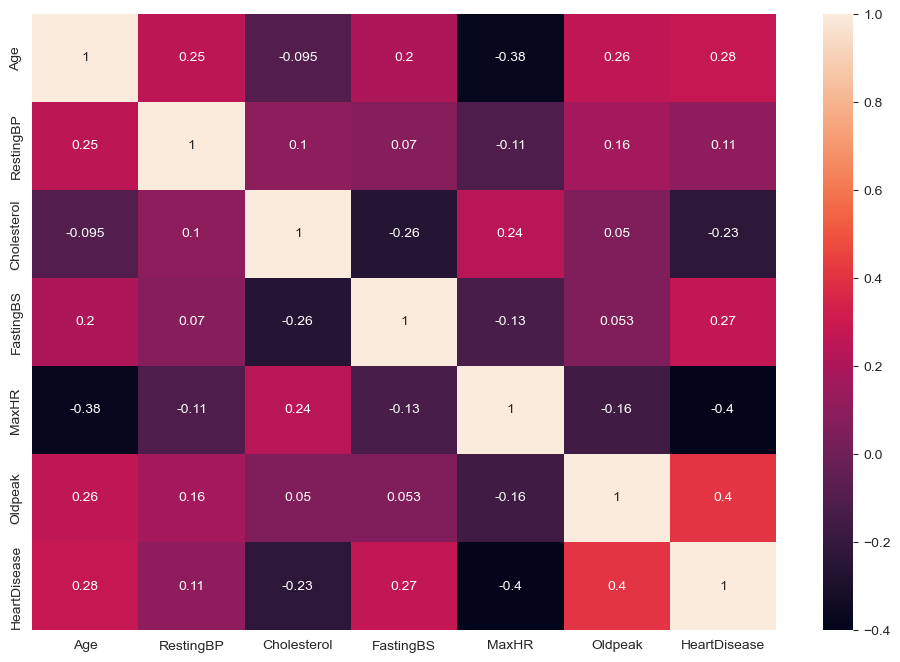

In [97]:
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True),annot=True);

# Interpretation We can do with this heatmap
1. Age has a correlation of 0.25 with Resting BP so we can interpret that if we increase Age Resting BP increases by 0.25 %
2. Age and cholesterol have a correltion approx near to 0 so there is a minor effect in change of any one of them .
3. Age has a correlation of 0.2 with FastingBP so we can interpret that if we increase Age FastingBP increases by 0.2 %
4. Age and MaxHR have negative correlation of -0.38 so if Age increases MaxHR decrease .
5. Age has a correlation of 0.26 with OLDpeak so we can interpret that if we increase Age Oldpeak increases by 0.26 % .
6. Heart Disease and FastingBS have a correaltion of 0.27 

 

# 4.1 Correlation between Max Heart Rate and heart Disease

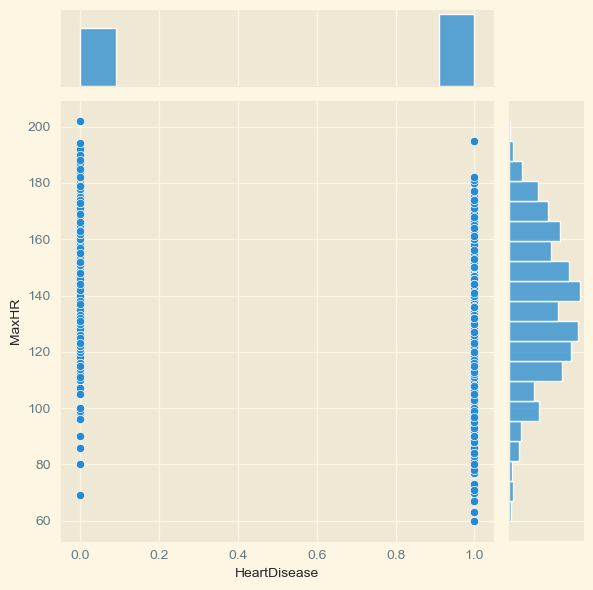

In [76]:
plt.style.use("Solarize_Light2")
sns.jointplot(x=data["HeartDisease"],y=data["MaxHR"])

See there is no correlation between MaxHr and HeartDisease.

# 4.2 Correlation between Age and Heart Disease

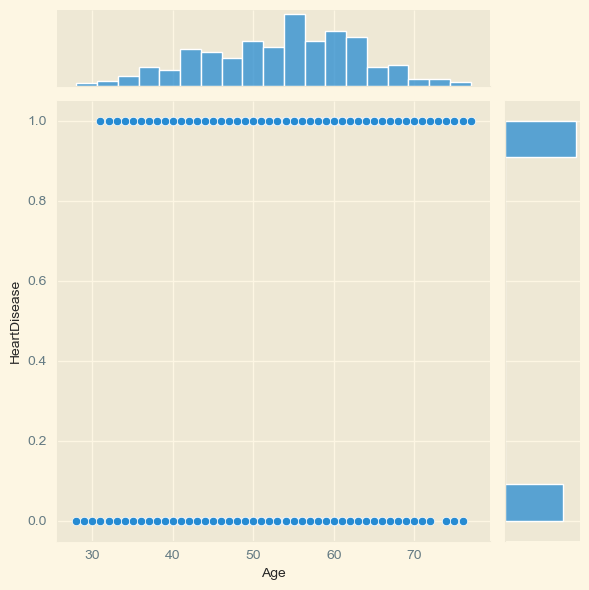

In [77]:
sns.jointplot(y=data["HeartDisease"],x=data["Age"])

There is almost no correlation between Age and Heart Disease

# 4.3 Plotting correlation between Cholesterol and Max Heart Disease

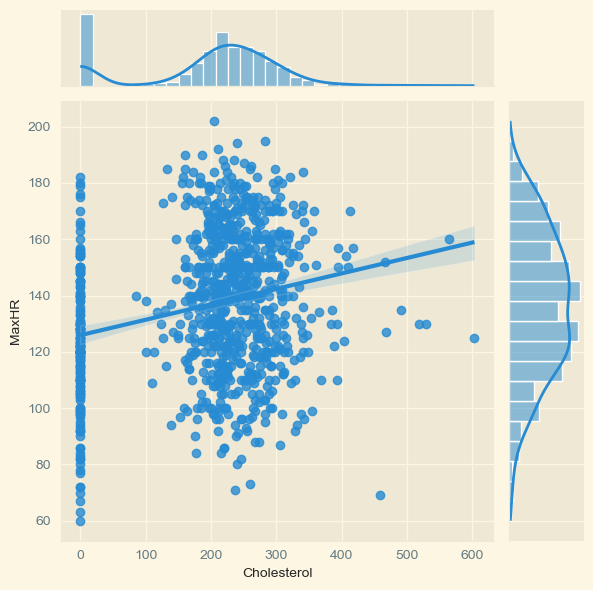

In [78]:
sns.jointplot(x=data["Cholesterol"],y=data["MaxHR"],kind="reg")

We can interpret that the Cholestrol and Max Heart Disease have a positive correlation and if one increases other also increases .

# 4.4 Plotting correlation between Age and Max heart Rate

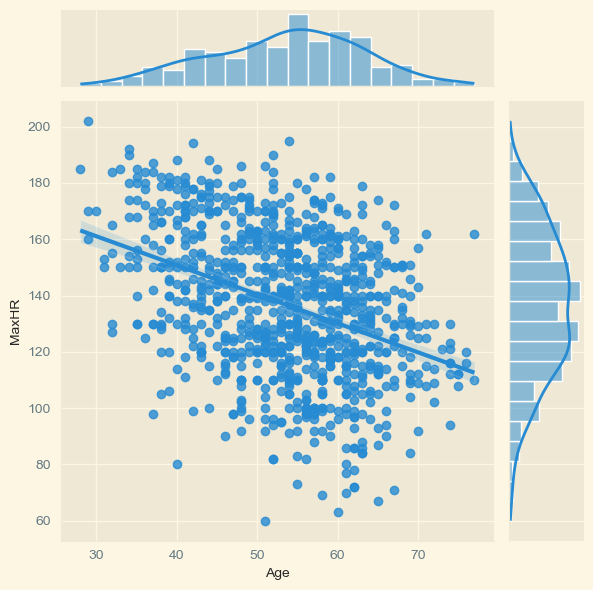

In [79]:
sns.jointplot(x=data["Age"],y=data["MaxHR"],kind="reg")

This shows that there is a negative correlation between MaxHR and Age , As age increases max heart rate decreases and we can also interpret by the basic knowledge that the kids have more heart rate than the middle aged poeple .

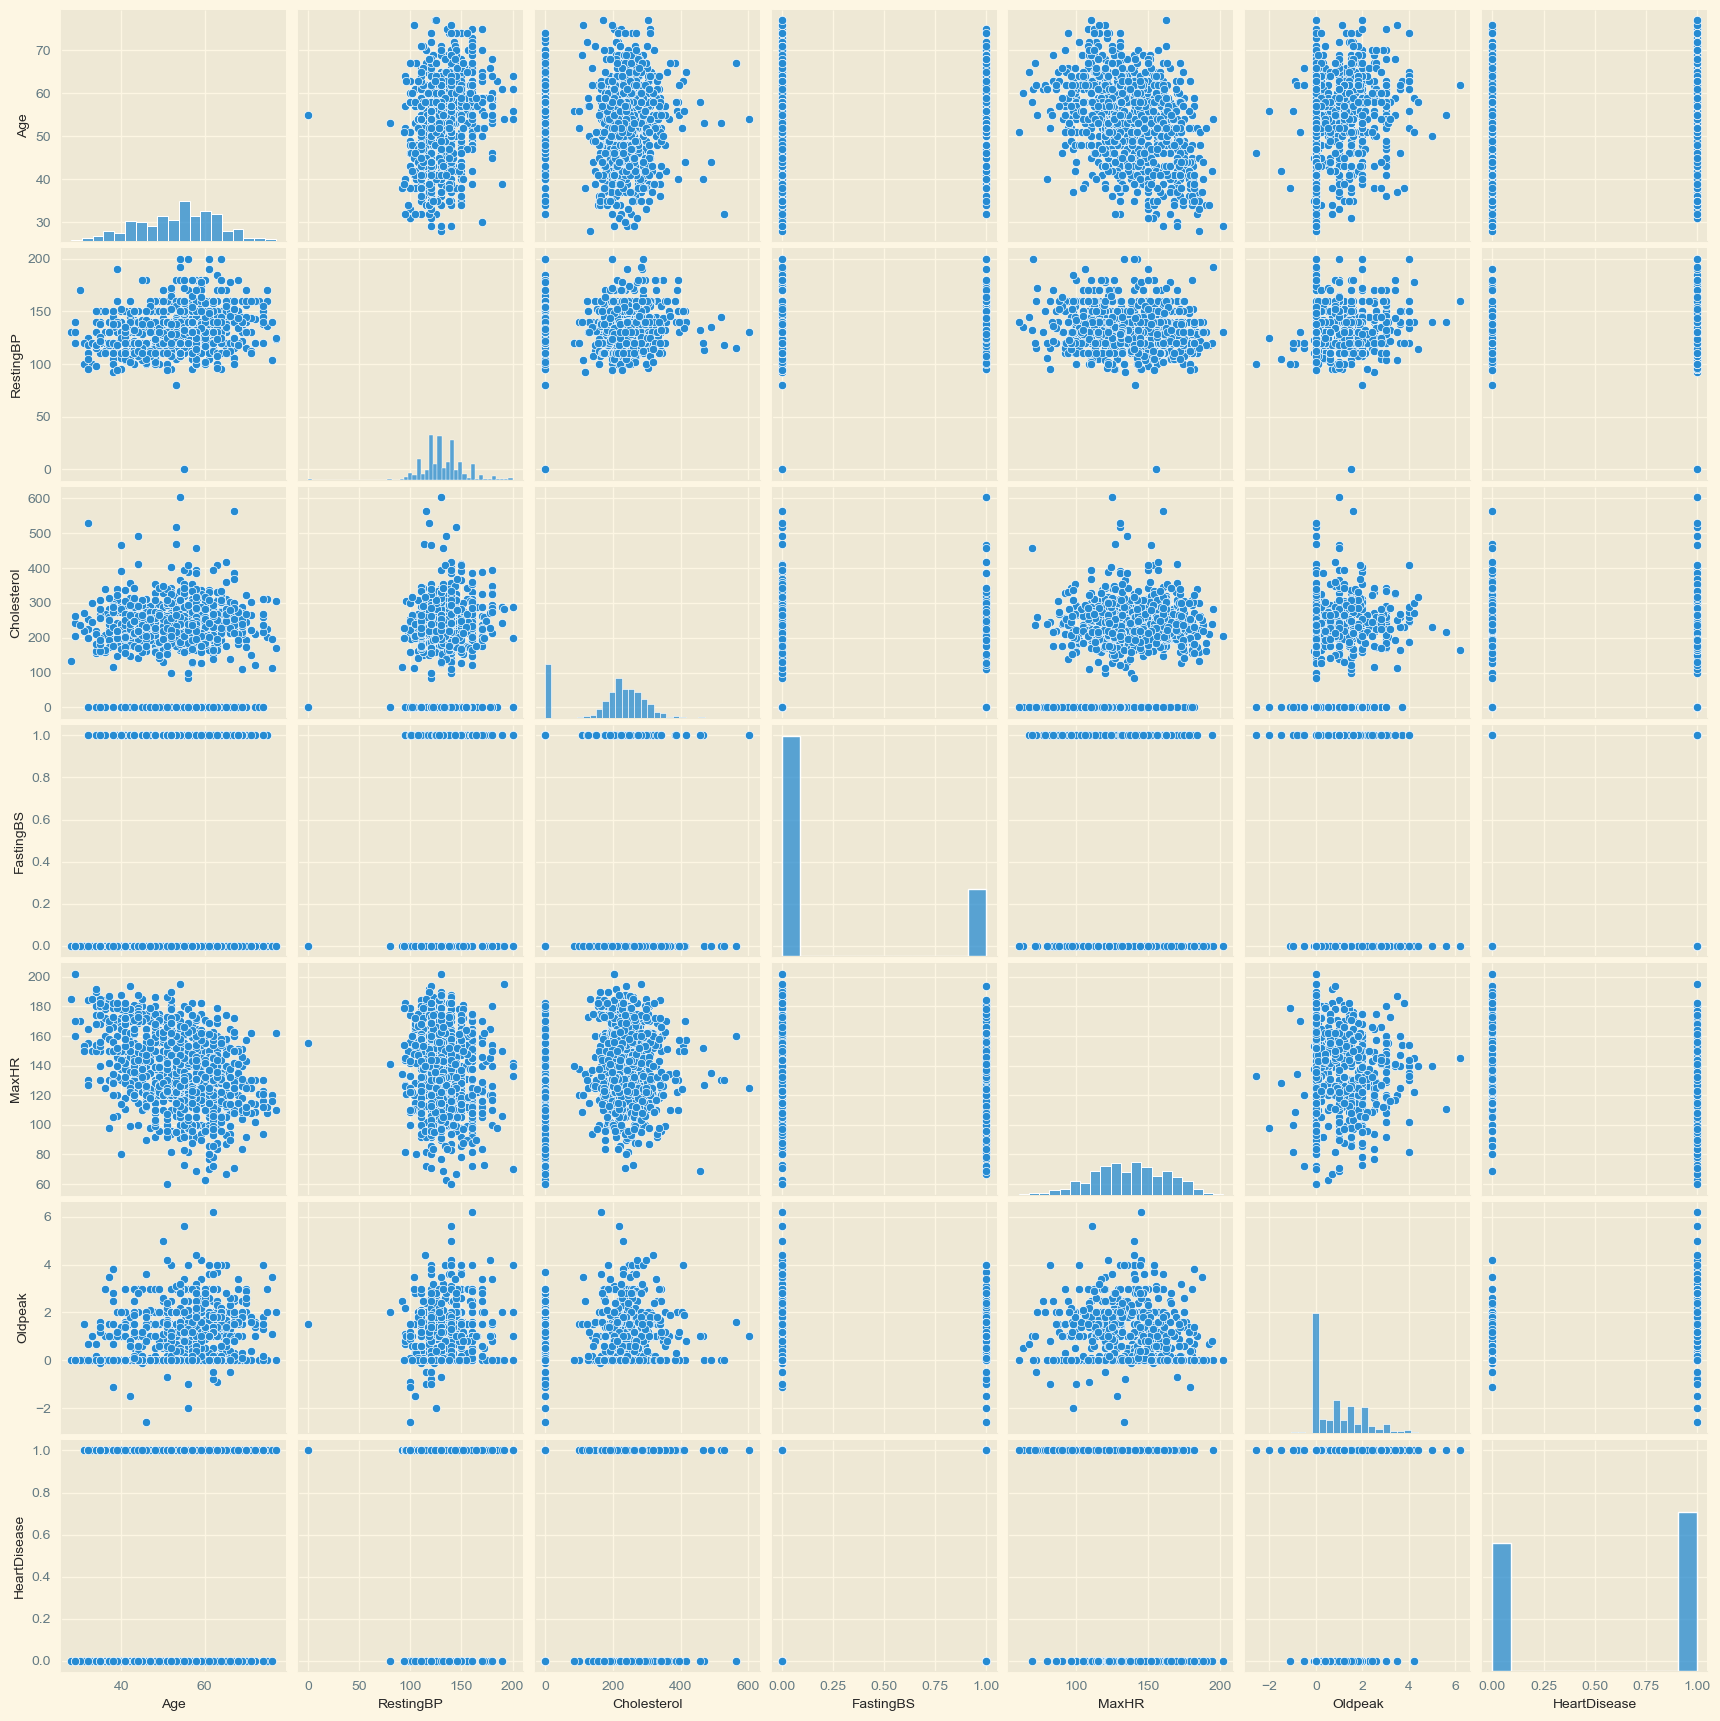

In [80]:
# Finding correlation at one go
sns.pairplot(data)